In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

data = pd.read_excel("Book1.xlsx")
data

,review_tag,processed_reviews
0,Good,yeapreordered july got august package wa nice ...
1,Good,got delivered yesterday used hour tell first m...
2,Good,amazing phone
3,Good,brilliant
4,Good,wa skeptically changing one plus word still pr...
...,...,...
9397,Bad,good
9398,Bad,poor
9399,Bad,bed
9400,Bad,average


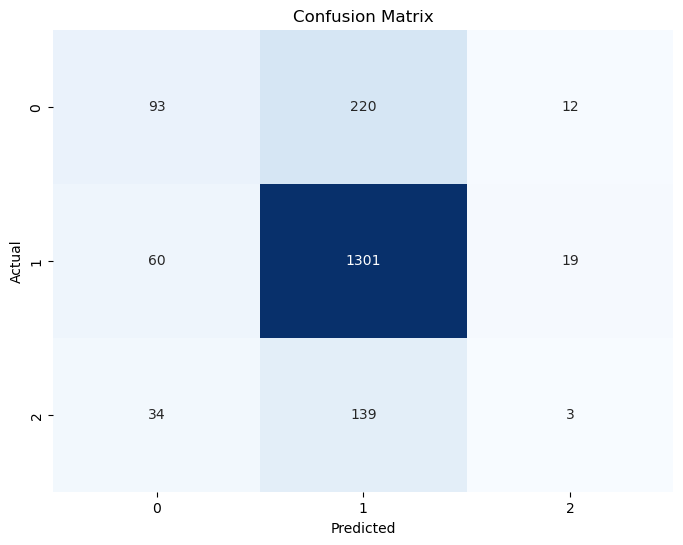

Accuracy: 0.7426900584795322

Classification Report:
               precision    recall  f1-score   support

         Bad       0.50      0.29      0.36       325
        Good       0.78      0.94      0.86      1380
    Moderate       0.09      0.02      0.03       176

    accuracy                           0.74      1881
   macro avg       0.46      0.42      0.42      1881
weighted avg       0.67      0.74      0.69      1881



In [4]:
reviews = data["processed_reviews"]
target = data["review_tag"]

#Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,
    stop_words="english"
)

tfidf_matrix = tfidf_vectorizer.fit_transform(reviews)

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, target, test_size=0.2, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

knn_model.fit(X_train, y_train)

predictions = knn_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

accuracy = accuracy_score(y_test, predictions)

report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)
